## Fluid Substitution and CO2

This lab is based on this paper: 

Macquet et al, 2019, "A feasibility study for detection thresholds of CO2 at shallow depths at the CaMI Field Research Station, Newell County, Alberta, Canada", Energy Geoscience Series, Vol 25, pp 509-518.  

## Python info:

This notebook uses something called pandas to setup calculations similar to how you would in a spreadsheet.  There are also data files, which you can absolutely load into a spreadsheet and do the calculations there.  I really encourage you to try this though because it is more powerful than a spreadsheet program, and I think that it is easier to write the equations because you can essentially write them with words instead of by referring to different columns.  As with all of the notebooks we've had, there are instructions throughout that are there to help you and to give python hints.  Make sure that you read them!

In [2]:
#Usual setup stuff, just evaluate this cell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Setup the parameters for the reservoir.  

You should not need to change this, but you should go through and make sure that you know what each variable is so that if you need them later you will know what their names are.

In [3]:
Gm=40e9#Pa        shear modulus of the reservoir
km=22e9#Pa        bulk modulus of the reservoir
rhom=2500#kg/m3   density of the reservoir
phi=0.1#          porosity of the reservoir 
n=3#              parameter in the density and bulk modulus calculations 
nu=0.3#           Poisson's ratio for the reservoir
P1=2.95e6#Pa      Reservoir pressure
kco2=0.003e9#Pa   bulk modulus of CO2 at the reservoir pressure
rhoco2=370#kg/m3  density of CO2 at the reservoir pressure
kbrine=2.21e9#Pa  bulk modulus of brine at the reservoir pressure
rhob=1000#kg/m3   density of brine at the reservoir pressure
depth=300#m       depth of the reservoir
g=9.8#kgm/s2      gravitational acceleration, used in lithostatic pressure
kdry=3.6e9#Pa     bulk modulus of the dry rock 
Gdry=4.8e9#Pa     shear modulus of the dry rock
m=5 #             parameter in fluid substitution
v_above=2700#m/s  velocity of the layer above the reservoir
v_below=3200#m/s  velocity of the layer below the reservoir
v_res_b4=3000#m/s velocity of the reservoir before any injection
res_thick=7#m     thickness of the reservoir

### Calculate the background values

This is question 3 on your assignment.  Use the parameters above to calculate the two-way traveltime, and the reflection coefficient between the reservoir and both the layer above and below it.  I recommend calculating the two-way-time (twt) in ms rather than s.

This cell will not work until you fill in the equations in place of the "FILLIN"

In [7]:
R0above=FILLIN
R0below=FILLIN
twt0=FILLIN 
print("twt="+str(twt0)+", R0above="+str(R0above)+", R0below="+str(R0below))

twt=4.666666666666667, R0above=0.05263157894736842, R0below=0.03225806451612903


This is the function we will use to calculate the densities and bulk moduli.  I have left it visibile so that you can see what's in there, but you do not need to change this cell (only evaluate it).  

In [8]:
def Calculate_changes(sco2,phi):
    #Calculate the changes in bulk modulus and density from the properties of the matrix
    #and the fluids within it (CO2 and brine).  Most parameters are set outside the function, 
    #but 
    #sco2 is the CO2 partial saturation and 
    #phi is the porosity
    #the function returns:
    #ksatb -- the bulk modulus of the saturated rock, and
    #rho_new -- the density of the saturated rock
    
    sbrine=1-sco2  #find brine partial saturation from CO2
    rho_fl=sco2*rhoco2+(1-sco2)*rhob  #calculate the density of the composite fluid
    rho_new=phi*rho_fl+(1-phi)*rhom   #calculate the density of the saturated rock
    kflb=(kbrine-kco2)*(1-sco2)**m+kco2  #calculate the bulk modulus of the fluid
    #calculate the composite bulk modulus of the saturated rock
    ksatb=kdry+(1-(kdry/km)**2)/((phi/kflb)+((1-phi)/km)-(kdry/km**2))  
    
    return rho_new,ksatb

### This cell does the calculations for density and bulk modulus

Again you do not need to change anything in here until the last question when you make find that changing sco2 gives interesting results.  (Once you've changed sco2 you need to evaluate all of the following cells.) 

In [10]:
sco2=0.3
phi=np.arange(5,30)*.01
rho_new,ksatb=Calculate_changes(sco2,phi)
dphi={'phi':phi,'rho_new':rho_new,'ksatb':ksatb}
phi_data=pd.DataFrame(dphi)


### Print out the data

Just to show you what you have to work with, this prints out the data that we have calculated.  You can see what density values are used, and what the corresponding density and saturation values are.  We will then access these data, using the column names, in the next cells to do the calculations and make the plots for question 4 and then to answer the last two questions.  

In [11]:
phi_data

,phi,rho_new,ksatb
0,0.05,2415.55,9.343136e+09
1,0.06,2398.66,8.571845e+09
2,0.07,2381.77,7.983191e+09
3,0.08,2364.88,7.519172e+09
4,0.09,2347.99,7.143993e+09
5,0.10,2331.10,6.834369e+09
6,0.11,2314.21,6.574500e+09
7,0.12,2297.32,6.353284e+09
8,0.13,2280.43,6.162694e+09
9,0.14,2263.54,5.996782e+09


### Now we are going to make the plots. 

I have setup the first one (Vp) for you so that you can see how to access each row.  Remember that the percentage change in something is: 
$$ perc_{change} = \frac{Val_{initial}-Val_{final}}{Val_{initial}} \times 100$$
or sometimes: 
$$ perc_{change} = \frac{2(Val_{initial}-Val_{final})}{Val_{initial}+Val_{final}}\times 100 $$

I have set things up for each of the quantities you need to calculate, but commented them out (with #) so that you can do one at a time and check that it is working.  I have the plotting setup for you if you use my variable names, if you change them then you will have to re-do that part below.

In [22]:
phi_data['Vp']=np.sqrt((phi_data['ksatb']+4/3*Gdry)/phi_data['rho_new'])
#phi_data['Rabove']=
#phi_data['Rbelow']=
#phi_data['twt']=
#phi_data['Vpchange']=
#phi_data['Rabovechange']=
#phi_data['Rbelowchange']=
#phi_data['twtchange']=

### Print out your table again

In [ ]:
phi_data

### Plot the results
These cells should evaluate once you have setup the corresponding variables above

<AxesSubplot:xlabel='porosity', ylabel='velocity change (%)'>

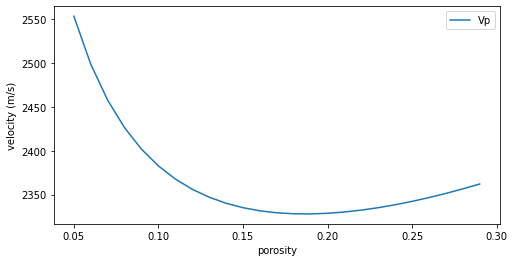

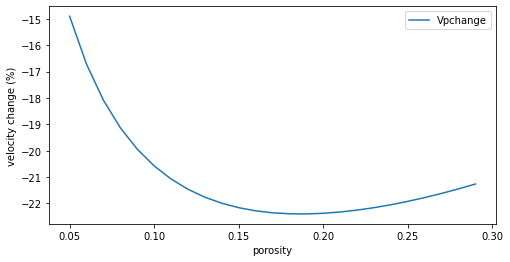

In [23]:
#phi_data.plot('phi')
phi_data.plot.line(x="phi", y="Vp", figsize=(8,4),
                   xlabel='porosity',ylabel='velocity (m/s)')
phi_data.plot.line(x="phi", y="Vpchange", figsize=(8,4),
                   xlabel='porosity',ylabel='velocity change (%)')

<AxesSubplot:xlabel='porosity', ylabel='Rbelow change (%)'>

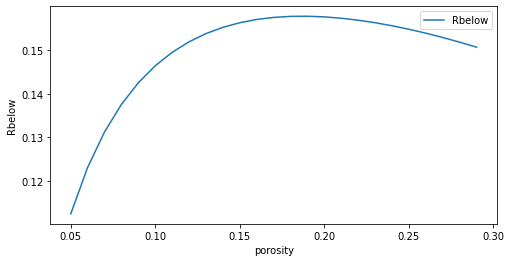

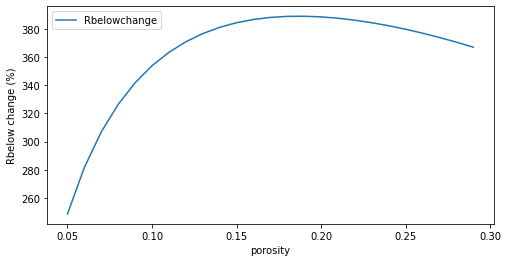

In [24]:
phi_data.plot.line(x="phi", y="Rbelow", figsize=(8,4),
                   xlabel='porosity',ylabel='Rbelow')
phi_data.plot.line(x="phi", y="Rbelowchange", figsize=(8,4),
                   xlabel='porosity',ylabel='Rbelow change (%)')

<AxesSubplot:xlabel='porosity', ylabel='Rabove change (%)'>

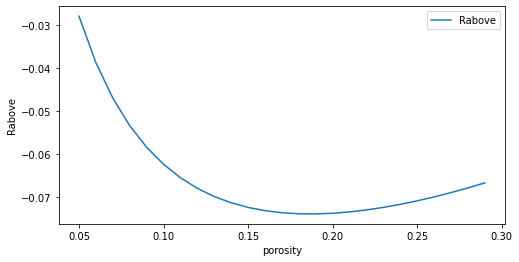

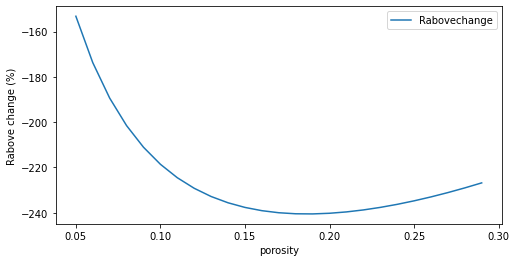

In [25]:
phi_data.plot.line(x="phi", y="Rabove", figsize=(8,4),
                   xlabel='porosity',ylabel='Rabove')
phi_data.plot.line(x="phi", y="Rabovechange", figsize=(8,4),
                   xlabel='porosity',ylabel='Rabove change (%)')

<AxesSubplot:xlabel='porosity', ylabel='twt change (%)'>

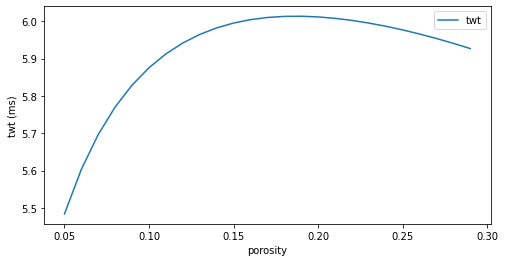

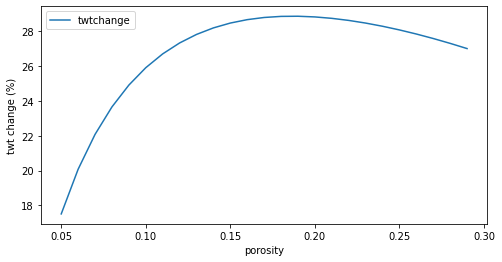

In [26]:
phi_data.plot.line(x="phi", y="twt", figsize=(8,4),
                   xlabel='porosity',ylabel='twt (ms)')
phi_data.plot.line(x="phi", y="twtchange", figsize=(8,4),
                   xlabel='porosity',ylabel='twt change (%)')

### Now we will repeat with the partial CO2 saturation

All of the instructions are the same as for the previous steps, except tha there you may find it useful to change phi for the last question.

In [13]:
sco2=np.arange(0,7)*.1
phi=.1
rho_new,ksatb=Calculate_changes(sco2,phi)
#np.savetxt('sco2_data.csv',np.array([sco2,rho_new,ksatb]).transpose())
dco2={'sco2':sco2,'rho_new':rho_new,'ksatb':ksatb}
sco2_data=pd.DataFrame(dco2)

In [14]:
sco2_data

,sco2,rho_new,ksatb
0,0.0,2350.0,1.596311e+10
1,0.1,2343.7,1.244520e+10
2,0.2,2337.4,9.285507e+09
3,0.3,2331.1,6.834369e+09
4,0.4,2324.8,5.205568e+09
5,0.5,2318.5,4.283941e+09
6,0.6,2312.2,3.847025e+09


### Do your calculations

These equations are the same as those you used above.  The only thing that you should need to change is the variable names from phi to sco2.

In [29]:
#sco2_data['Vp']=
#sco2_data['Rabove']=
#sco2_data['Rbelow']=
#sco2_data['twt']=
#sco2_data['Vpchange']=
#sco2_data['Rabovechange']=
#sco2_data['Rbelowchange']=
#sco2_data['twtchange']=

In [15]:
sco2_data

,sco2,rho_new,ksatb
0,0.0,2350.0,1.596311e+10
1,0.1,2343.7,1.244520e+10
2,0.2,2337.4,9.285507e+09
3,0.3,2331.1,6.834369e+09
4,0.4,2324.8,5.205568e+09
5,0.5,2318.5,4.283941e+09
6,0.6,2312.2,3.847025e+09


<AxesSubplot:xlabel='CO2 partial saturation', ylabel='velocity change (%)'>

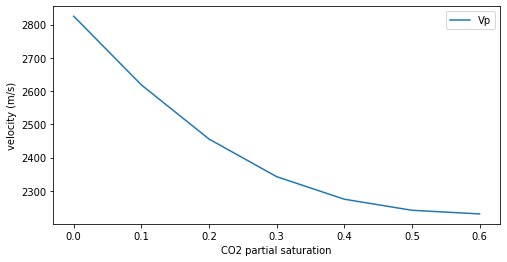

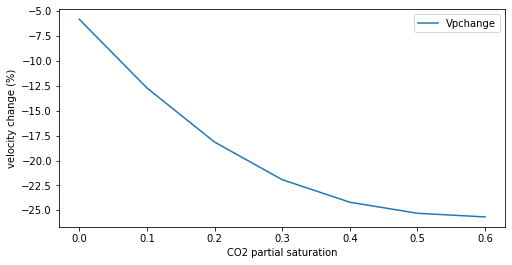

In [30]:
sco2_data.plot.line(x="sco2", y="Vp", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='velocity (m/s)')
sco2_data.plot.line(x="sco2", y="Vpchange", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='velocity change (%)')

<AxesSubplot:xlabel='CO2 partial saturation', ylabel='Rbelow change (%)'>

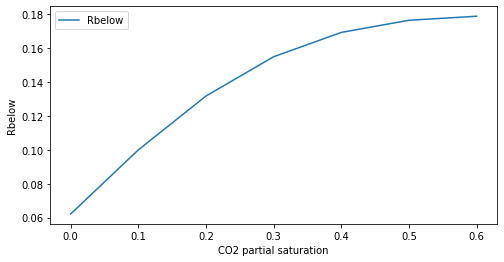

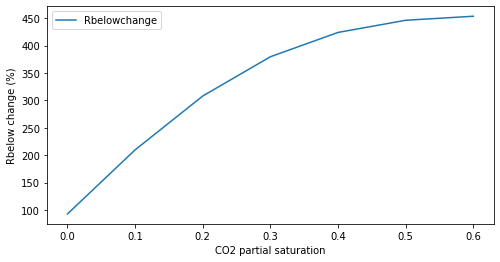

In [31]:
sco2_data.plot.line(x="sco2", y="Rbelow", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='Rbelow')
sco2_data.plot.line(x="sco2", y="Rbelowchange", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='Rbelow change (%)')

<AxesSubplot:xlabel='CO2 partial saturation', ylabel='Rabove change (%)'>

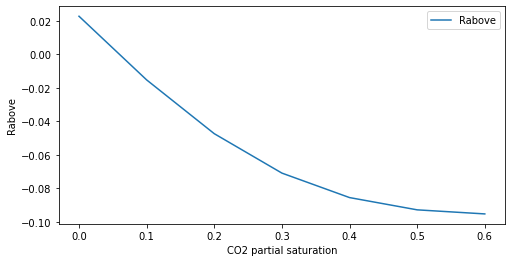

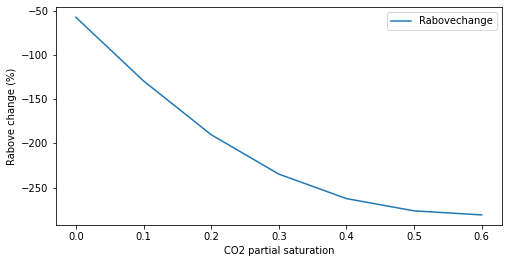

In [32]:
sco2_data.plot.line(x="sco2", y="Rabove", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='Rabove')
sco2_data.plot.line(x="sco2", y="Rabovechange", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='Rabove change (%)')

<AxesSubplot:xlabel='CO2 partial saturation', ylabel='twt change (%)'>

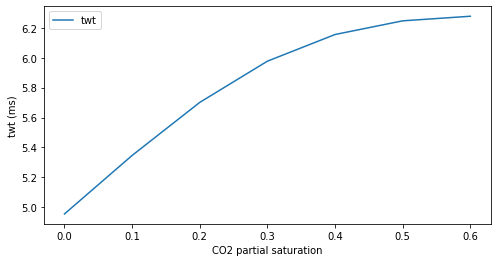

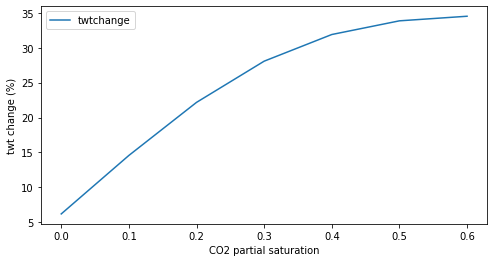

In [33]:
sco2_data.plot.line(x="sco2", y="twt", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='twt (ms)')
sco2_data.plot.line(x="sco2", y="twtchange", figsize=(8,4),
                   xlabel='CO2 partial saturation',ylabel='twt change (%)')